## Import packages

In [ ]:
import cv2 as cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from ultralytics.utils.plotting import Colors

Custom color palette

In [ ]:
custom_palette = {
    0:  (0, 0, 0),        # black
    1:  (255, 0, 0),      # blue
    2:  (42, 42, 165),    # brown
    3:  (55, 175, 212),   # gold
    4:  (0, 255, 0),      # green
    5:  (128, 128, 128),  # grey
    6:  (0, 165, 255),    # orange
    7:  (0, 0, 255),      # red
    8:  (192, 192, 192),  # silver
    9:  (230, 0, 255),    # violet
    10: (255, 255, 255),  # white
    11: (0, 255, 255)     # yellow
}

# Override the default palette
colors = Colors()
colors.palette = custom_palette  # Replace with your custom colors

Load the model.

In [ ]:
best_model = YOLO('train_yolov8n/weights/best.pt')

Inference an image.


image 1/1 d:\git\ITMO\ML\ML_3\test_img\test_5.jpg: 640x640 5 blacks, 5 browns, 1 green, 1 orange, 9 reds, 2 violets, 1 yellow, 97.1ms
Speed: 5.0ms preprocess, 97.1ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


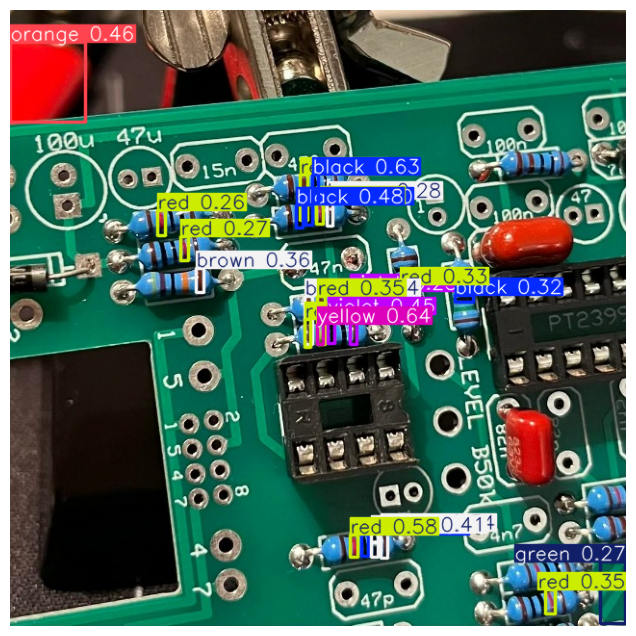

In [ ]:
# Run inference on an image
results = best_model('test_img/test_5.jpg')

im_array = results[0].plot(line_width=2)  # plot detection results

im = cv2.cvtColor(im_array, cv2.COLOR_BGR2RGB)  # BGR to RGB
plt.figure(figsize=(12, 8))
plt.imshow(im)
plt.axis('off')
plt.show()

In [4]:
# Получаем имена классов
names = best_model.names  # словарь {id: name}

for i, result in enumerate(results):
    print(f"\n--- Результат для кадра {i+1} ---")

    boxes = result.boxes

    # Извлекаем данные
    class_ids = boxes.cls.int().cpu().tolist()        # ID классов
    confidences = boxes.conf.cpu().tolist()           # Confidence (уверенность)
    classNames = [names[id] for id in class_ids]      # Названия классов

    # Выводим пары "класс - уверенность"
    for name, conf in zip(classNames, confidences):
        print(f"{name:<10} | Confidence: {conf:.2f}")


--- Результат для кадра 1 ---
yellow     | Confidence: 0.64
black      | Confidence: 0.63
red        | Confidence: 0.58
black      | Confidence: 0.48
red        | Confidence: 0.48
orange     | Confidence: 0.46
violet     | Confidence: 0.45
brown      | Confidence: 0.41
black      | Confidence: 0.40
black      | Confidence: 0.37
brown      | Confidence: 0.36
red        | Confidence: 0.35
red        | Confidence: 0.35
brown      | Confidence: 0.34
red        | Confidence: 0.34
brown      | Confidence: 0.34
red        | Confidence: 0.33
black      | Confidence: 0.32
red        | Confidence: 0.30
brown      | Confidence: 0.28
green      | Confidence: 0.27
red        | Confidence: 0.27
red        | Confidence: 0.26
violet     | Confidence: 0.25
